<a href="https://colab.research.google.com/github/abigail2rose/NGG6050/blob/main/0919.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Example

Text(0, 0.5, '')

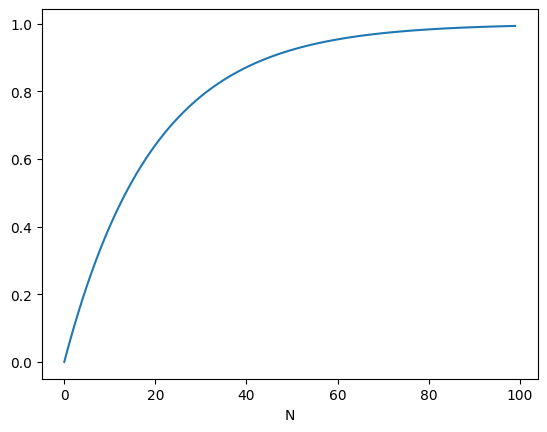

In [1]:
import matplotlib.pyplot as plt
import numpy as np

alpha = 0.05
N = np.arange(0,100)
plt.plot(N, 1-(1-alpha)**N)
plt.xlabel('N')
plt.ylabel('')

Exercise
In this exercise we will run through an example of correcting for multiple comparisons with both the Benjamini-Hochberg procedure and the more conservative Bonferroni correction.

First, simulate multiple (say, 1000) t-tests comparing two samples with equal means and standard deviations, and save the p-values. Obviously, at p<0.05 we expect that ~5% of the simulations to yield a "statistically significant" result (of rejecting the NULL hypothesis that the samples come from distributions with equal means).

Second, once you have the simulated p-values, apply both methods to address the multiple comparisons problem.




Percentage of Significant Tests (at 5.00% cutoff) without correction: 5.2 %
Percentage of Significant Tests (at 5.00% cutoff) with Bonferroni correction: 0.0 %
Percentage of Significant Tests (at 5.00% cutoff) with Benjamini-Hochberg correction: 99.9 %


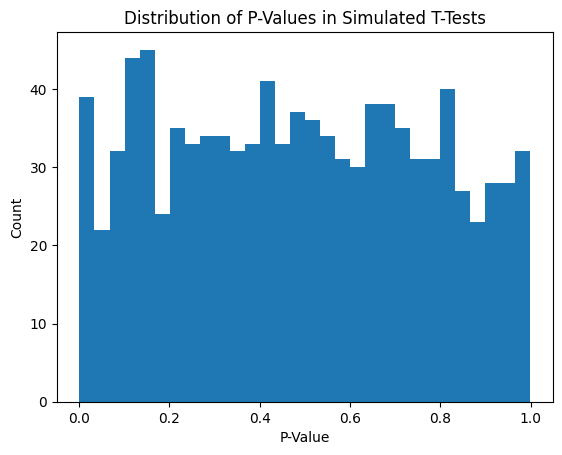

In [25]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# number of simulations
num_simulations = 1000

# sample size for each group
sample_size = 100

# means and standard deviations for both groups (equal for simplicity)
mean_1 = 10
mean_2 = 10
std_dev = 5

# Significance level (alpha) -  0.05 (5%)
alpha = 0.05

# Lists to store results
p_values = []
significant_tests_raw = []
significant_tests_bonferroni = []
significant_tests_fdr = []

# Loop through each sim
for _ in range(num_simulations):

  # random samples from normal distributions for each group
  group_1 = np.random.normal(mean_1, std_dev, sample_size)
  group_2 = np.random.normal(mean_2, std_dev, sample_size)

  # calc the t-statistic (compares the means of the two groups)
  t_statistic, p_value = stats.ttest_ind(group_1, group_2)

  # store the p-value
  p_values.append(p_value)

  # check to see if the calculated p-value is less than significant
  #list stores the results of each simulation, true or false
  significant_tests_raw.append(p_value < alpha)

# Multiple Comparison Corrections

# 1 Bonferroni Correction
#The simplest way to correct for Type I errors (false positives) in multiple
#comparisons is to divide  by the number of comparisons
bonferroni_alpha = alpha / num_simulations
significant_tests_bonferroni = [p < bonferroni_alpha for p in p_values]

# 2 Benjamini-Hochberg Procedure
# Rank p-values in ascending order
ranked_p_values = np.array(p_values)
ranked_indices = ranked_p_values.argsort()
ranked_p_values = ranked_p_values[ranked_indices]

# Calculate critical values
#as (i/n)Q, where i is the rank, n is the total number of tests
#Q is the false discovery rate (a percentage) that you choose (typically 0.05).
Q = 0.05
critical_values = [((i + 1) / num_simulations) * Q for i in range(num_simulations)]

# Find the largest p-value that is still significant after correction
for i in range(num_simulations):
  if ranked_p_values[i] > critical_values[i]:
    significant_tests_fdr = [p <= ranked_p_values[i - 1] for p in p_values]

# Print results
print(f"Percentage of Significant Tests (at {alpha*100:.2f}% cutoff) without correction:",
      (sum(significant_tests_raw) / num_simulations) * 100, "%")

print(f"Percentage of Significant Tests (at {alpha*100:.2f}% cutoff) with Bonferroni correction:",
      (sum(significant_tests_bonferroni) / num_simulations) * 100, "%")

print(f"Percentage of Significant Tests (at {alpha*100:.2f}% cutoff) with Benjamini-Hochberg correction:",
      (sum(significant_tests_fdr) / num_simulations) * 100, "%")

# Visualize the distribution of p-values
plt.hist(p_values, bins=30)
plt.title("Distribution of P-Values in Simulated T-Tests")
plt.xlabel("P-Value")
plt.ylabel("Count")
plt.show()


Third, set the sample 1 and sample 2 means to be 1 and 2 respectively, and re-run the exercise. What do you notice? What if you make the difference between means even greater?

Percentage of Significant Tests (at 5.00% cutoff) without correction: 30.2 %
Percentage of Significant Tests (at 5.00% cutoff) with Bonferroni correction: 0.5 %
Percentage of Significant Tests (at 5.00% cutoff) with Benjamini-Hochberg correction: 99.9 %


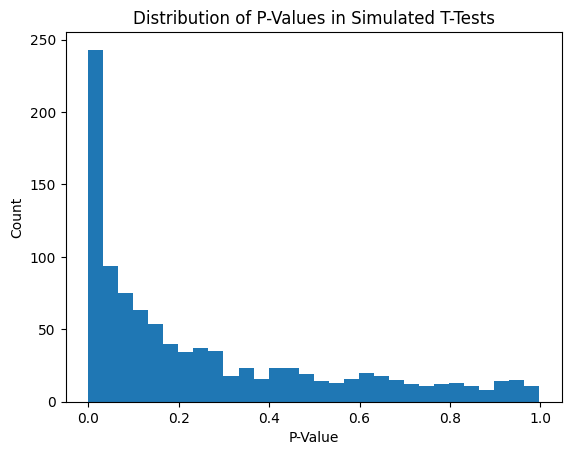

In [28]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# number of simulations
num_simulations = 1000

# sample size for each group
sample_size = 100

# means and standard deviations for both groups (equal for simplicity)
mean_1 = 1
mean_2 = 2
std_dev = 5

# Significance level (alpha) -  0.05 (5%)
alpha = 0.05

# Lists to store results
p_values = []
significant_tests_raw = []
significant_tests_bonferroni = []
significant_tests_fdr = []

# Loop through each sim
for _ in range(num_simulations):

  # random samples from normal distributions for each group
  group_1 = np.random.normal(mean_1, std_dev, sample_size)
  group_2 = np.random.normal(mean_2, std_dev, sample_size)

  # calc the t-statistic (compares the means of the two groups)
  t_statistic, p_value = stats.ttest_ind(group_1, group_2)

  # store the p-value
  p_values.append(p_value)

  # check to see if the calculated p-value is less than significant
  #list stores the results of each simulation, true or false
  significant_tests_raw.append(p_value < alpha)

# Multiple Comparison Corrections

# 1 Bonferroni Correction
#The simplest way to correct for Type I errors (false positives) in multiple
#comparisons is to divide  by the number of comparisons
bonferroni_alpha = alpha / num_simulations
significant_tests_bonferroni = [p < bonferroni_alpha for p in p_values]

# 2 Benjamini-Hochberg Procedure
# Rank p-values in ascending order
ranked_p_values = np.array(p_values)
ranked_indices = ranked_p_values.argsort()
ranked_p_values = ranked_p_values[ranked_indices]

# Calculate critical values
#as (i/n)Q, where i is the rank, n is the total number of tests
#Q is the false discovery rate (a percentage) that you choose (typically 0.05).
Q = 0.05
critical_values = [((i + 1) / num_simulations) * Q for i in range(num_simulations)]

# Find the largest p-value that is still significant after correction
for i in range(num_simulations):
  if ranked_p_values[i] > critical_values[i]:
    significant_tests_fdr = [p <= ranked_p_values[i - 1] for p in p_values]

# Print results
print(f"Percentage of Significant Tests (at {alpha*100:.2f}% cutoff) without correction:",
      (sum(significant_tests_raw) / num_simulations) * 100, "%")

print(f"Percentage of Significant Tests (at {alpha*100:.2f}% cutoff) with Bonferroni correction:",
      (sum(significant_tests_bonferroni) / num_simulations) * 100, "%")

print(f"Percentage of Significant Tests (at {alpha*100:.2f}% cutoff) with Benjamini-Hochberg correction:",
      (sum(significant_tests_fdr) / num_simulations) * 100, "%")

# Visualize the distribution of p-values
plt.hist(p_values, bins=30)
plt.title("Distribution of P-Values in Simulated T-Tests")
plt.xlabel("P-Value")
plt.ylabel("Count")
plt.show()

Percentage of Significant Tests (at 5.00% cutoff) without correction: 100.0 %
Percentage of Significant Tests (at 5.00% cutoff) with Bonferroni correction: 100.0 %
Percentage of Significant Tests (at 5.00% cutoff) with Benjamini-Hochberg correction: 0.0 %


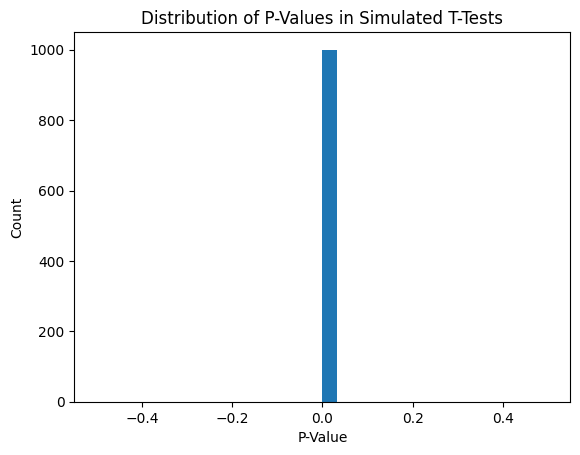

In [29]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# number of simulations
num_simulations = 1000

# sample size for each group
sample_size = 100

# means and standard deviations for both groups (equal for simplicity)
mean_1 = 1
mean_2 = 500
std_dev = 5

# Significance level (alpha) -  0.05 (5%)
alpha = 0.05

# Lists to store results
p_values = []
significant_tests_raw = []
significant_tests_bonferroni = []
significant_tests_fdr = []

# Loop through each sim
for _ in range(num_simulations):

  # random samples from normal distributions for each group
  group_1 = np.random.normal(mean_1, std_dev, sample_size)
  group_2 = np.random.normal(mean_2, std_dev, sample_size)

  # calc the t-statistic (compares the means of the two groups)
  t_statistic, p_value = stats.ttest_ind(group_1, group_2)

  # store the p-value
  p_values.append(p_value)

  # check to see if the calculated p-value is less than significant
  #list stores the results of each simulation, true or false
  significant_tests_raw.append(p_value < alpha)

# Multiple Comparison Corrections

# 1 Bonferroni Correction
#The simplest way to correct for Type I errors (false positives) in multiple
#comparisons is to divide  by the number of comparisons
bonferroni_alpha = alpha / num_simulations
significant_tests_bonferroni = [p < bonferroni_alpha for p in p_values]

# 2 Benjamini-Hochberg Procedure
# Rank p-values in ascending order
ranked_p_values = np.array(p_values)
ranked_indices = ranked_p_values.argsort()
ranked_p_values = ranked_p_values[ranked_indices]

# Calculate critical values
#as (i/n)Q, where i is the rank, n is the total number of tests
#Q is the false discovery rate (a percentage) that you choose (typically 0.05).
Q = 0.05
critical_values = [((i + 1) / num_simulations) * Q for i in range(num_simulations)]

# Find the largest p-value that is still significant after correction
for i in range(num_simulations):
  if ranked_p_values[i] > critical_values[i]:
    significant_tests_fdr = [p <= ranked_p_values[i - 1] for p in p_values]

# Print results
print(f"Percentage of Significant Tests (at {alpha*100:.2f}% cutoff) without correction:",
      (sum(significant_tests_raw) / num_simulations) * 100, "%")

print(f"Percentage of Significant Tests (at {alpha*100:.2f}% cutoff) with Bonferroni correction:",
      (sum(significant_tests_bonferroni) / num_simulations) * 100, "%")

print(f"Percentage of Significant Tests (at {alpha*100:.2f}% cutoff) with Benjamini-Hochberg correction:",
      (sum(significant_tests_fdr) / num_simulations) * 100, "%")

# Visualize the distribution of p-values
plt.hist(p_values, bins=30)
plt.title("Distribution of P-Values in Simulated T-Tests")
plt.xlabel("P-Value")
plt.ylabel("Count")
plt.show()

As the difference between the means increases the percentage of significant results without corrections increases because of the larger uncorrected difference. With the Bonferroni correction we see a change from 0.5% to 100% with a larger difference while with the Ben-Hoch we go from 99% to 0% when the means increase.